In [1]:
import keras
from keras.models import Sequential
from keras import backend as K
import os
import warnings
from keras.models import Model
from keras.layers import Input
from keras import layers
from keras.layers import Dense, Merge
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import ZeroPadding2D
from keras.layers import BatchNormalization
from keras.models import Model
from keras import backend as K
from keras.engine.topology import get_source_inputs
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
import tensorflow as tf
os.environ['PYTHONASHSEED']= '0'
from keras.models import load_model
from keras.optimizers import SGD, RMSprop, Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import  BatchNormalization
from keras.layers.convolutional import *
import numpy as np
import tensorflow as tf
# import theano
import  matplotlib.pyplot as plt
import matplotlib
import itertools
from numpy import*
from sklearn.utils import shuffle
%matplotlib inline
import random as rn
from keras.preprocessing import image

from keras.utils import plot_model
from keras import regularizers


Using TensorFlow backend.


In [2]:

#setting  the  seed for nummy_gennerated random numbers
np.random.seed(47)
#seting the seed for python random numbers
rn.seed(122)
#seting the seed for tensorflow random numbers
tf.set_random_seed(60)

In [3]:
import os
classes_name = []
files_name = []
for root, dirs, files in os.walk('Dataset1/train_data'):  
    for name in dirs:
        classes_name.append(name)
    for name1 in files:
        files_name.append(name1)

print(len(classes_name))


2


In [4]:
##### calculate  number of images
import os
classes_name_train = []
files_name_train = []
classes_name_test = []
files_name_test = []
for root, dirs, files in os.walk('Dataset1/train_data'):  
    for name in dirs:
        classes_name_train.append(name)
    for name1 in files:
        files_name_train.append(name1)
        
for root, dirs, files in os.walk('Dataset1/test_data'):  
    for name in dirs:
        classes_name_test.append(name)
    for name1 in files:
        files_name_test.append(name1)

no_training = len(files_name_train)
no_testing = len(files_name_test)
        
print(len(classes_name_train))
print(len(files_name_train))
print(len(classes_name_test))
print(len(files_name_test))
number_classes = len(classes_name_train)

2
321
2
79


In [5]:
# data_generator = ImageDataGenerator(
#                         featurewise_center=False,
#                         featurewise_std_normalization=False,
#                         rotation_range=10,
#                         width_shift_range=0.1,
#                         height_shift_range=0.1,
#                         zoom_range=.1,
#                         horizontal_flip=True)

In [6]:
batch_size = 8
n_epochs = 500

In [7]:
train_path = 'Dataset1/train_data'
test_path = 'Dataset1/test_data'
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size = (224,224), classes = classes_name, batch_size = batch_size)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size = (224,224), classes = classes_name, batch_size = batch_size)


Found 321 images belonging to 2 classes.
Found 79 images belonging to 2 classes.


In [8]:
# plots images with labels  within jupyter notebook

def plots(ims, figsize = (12,6), rows=1, interp =False , titles = None):
    if  type(ims[0]) is  np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] !=3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize = figsize) 
    cols = len(ims)// rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows,cols,i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation = None if interp else 'none')
        plt.show()

In [9]:
imgs, labels = next(train_batches)


In [10]:
train_path = 'Dataset1/train_data'
test_path = 'Dataset1/test_data'
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size = (224,224), classes = classes_name, batch_size = batch_size)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size = (224,224), classes = classes_name, batch_size = batch_size)


Found 321 images belonging to 2 classes.
Found 79 images belonging to 2 classes.


In [11]:
# plots images with labels  within jupyter notebook

def plots(ims, figsize = (12,6), rows=1, interp =False , titles = None):
    if  type(ims[0]) is  np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] !=3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize = figsize) 
    cols = len(ims)// rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows,cols,i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation = None if interp else 'none')
        plt.show()

In [12]:
imgs, labels = next(train_batches)


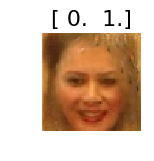

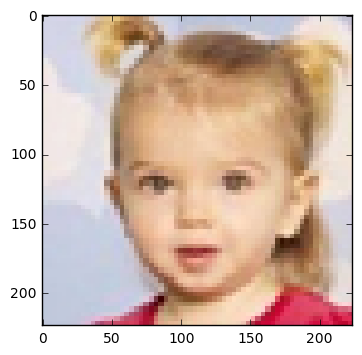

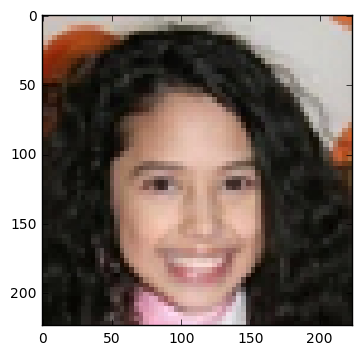

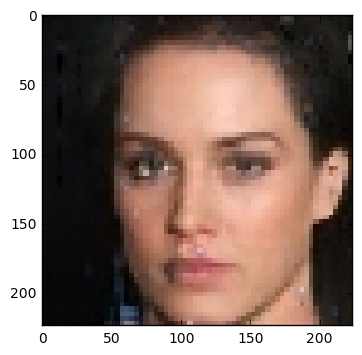

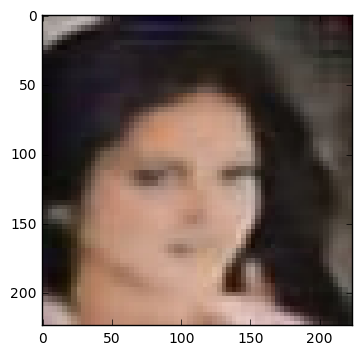

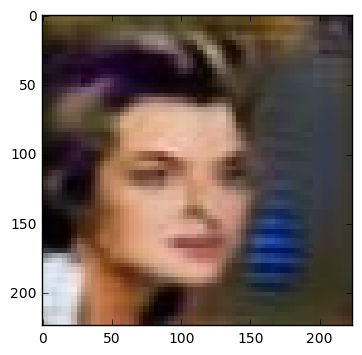

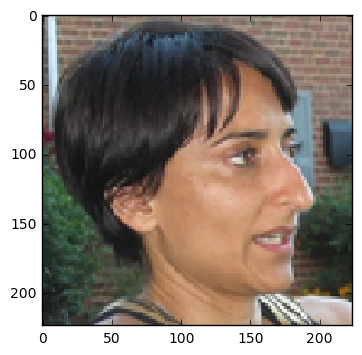

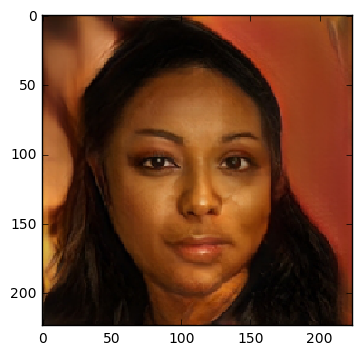

In [13]:
plots(imgs, titles = labels)

In [14]:
##################### VGG16################# 
#################################################
def VGG16(input_tensor=None, input_shape=None, pooling=None, classes=1000):
    
    # Determine proper input shape
    if input_shape == None:
        input_shape = (224,224,3)
    
    img_input = Input(input_shape)

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block11_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block11_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block11_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block12_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block12_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block12_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block13_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block13_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block13_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block13_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block14_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block14_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block14_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block15_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block15_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block15_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block15_pool')(x)

        # Classification block
    x = Flatten(name='flatten1')(x)
    x = Dense(4096, activation='relu', name='fc11')(x)
    x = Dense(4096, activation='relu', name='fc12')(x)
    x = Dense(classes, activation='softmax', name='predictions1')(x)


    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input
    # Create model.
    model = Model(inputs, x, name='vgg16')
    return model

In [15]:
vgg16_model = VGG16()
vgg16_model.load_weights('vgg16_weights_tf_dim_ordering_tf_kernels.h5')
#vgg16_model.summary()

In [16]:
##################### VGG19 ################# 
#################################################

def VGG19(input_tensor=None, input_shape=None, pooling=None, classes=1000):
    
    # Determine proper input shape
    if input_shape == None:
        input_shape = (224,224,3)
    
    img_input = Input(input_shape)
    
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block21_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block21_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block21_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block22_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block22_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block22_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block23_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block23_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block23_conv3')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block23_conv4')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block23_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block24_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block24_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block24_conv3')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block24_conv4')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block24_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block25_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block25_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block25_conv3')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block25_conv4')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block25_pool')(x)


    # Classification block
    
    x = Flatten(name='flatten2')(x)
    x = Dense(4096, activation='relu', name='fc21')(x)
    x = Dense(4096, activation='relu', name='fc22')(x)
    x = Dense(classes, activation='softmax', name='predictions2')(x)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input
    # Create model.
    model = Model(inputs, x, name='vgg19')
    return model

In [17]:
vgg19_model = VGG19()
vgg19_model.load_weights('vgg19_weights_tf_dim_ordering_tf_kernels.h5')
# vgg19_model.summary()

In [18]:
model1 = Sequential()
for layer in vgg16_model.layers:
    model1.add(layer)

In [19]:
for i in range(0,3): 
    model1.layers.pop()

n = len(model1.layers)
for idx, layer in enumerate(model1.layers):
    if idx < (n-1): 
           layer.trainable = False  
    else:
           layer.trainable = False
            



In [20]:
model2 = Sequential()
for layer in vgg19_model.layers:
    model2.add(layer)

In [21]:
for i in range(0,3): 
    model2.layers.pop()
n = len(model2.layers)
for idx, layer in enumerate(model2.layers):
    if idx < (n-1): 
           layer.trainable = False  
    else:
           layer.trainable = False            



In [22]:
model1.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block11_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
_________________________________________________________________
block11_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
_________________________________________________________________
block11_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
_________________________________________________________________
block12_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
_________________________________________________________________
block12_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
_________________________________________________________________
block12_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
__________

In [23]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block21_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
_________________________________________________________________
block21_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
_________________________________________________________________
block21_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
_________________________________________________________________
block22_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
_________________________________________________________________
block22_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
_________________________________________________________________
block22_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
__________

In [24]:

def stream_model(input_tensor=None, model1 = model1, model2 = model2,   input_shape=None, classes=2):
    
    # Determine proper input shape
    if input_shape == None:
        input_shape = (224,224,3)
    
    img_input = Input(input_shape)
    
    # Block 1
    x1 = model1(img_input)
    
    # Block 2 
    x2 = model2(img_input)   
    merged = keras.layers.concatenate([x1, x2], axis=1)
    
    # Classification block
    out = Dense(classes, activation = 'linear', kernel_regularizer = regularizers.l2(0.001), )(merged)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input
        
    # Create model.
    model = Model(inputs, out, name='stream_model')
    return model



In [25]:
model = stream_model()

In [26]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 1000)         14714688    input_3[0][0]                    
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 1000)         20024384    input_3[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 2000)         0           sequential_1[1][0]               
                                                                 sequential_2[1][0]               
__________

In [27]:
n = len(model.layers)
for idx, layer in enumerate(model.layers):
    if idx < (n-1): 
           layer.trainable = False  
    else:
           layer.trainable = True 

In [28]:
opt = Adam(lr=0.001, decay=10e-6)
model.compile(loss='hinge', optimizer=opt, metrics=['accuracy'])

In [29]:
### training    
from keras.callbacks import ModelCheckpoint
# Save check point
filepath = "vggface3.weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose =1, save_best_only = True, mode ='max')
callbacks_list= [checkpoint]
 # Fit the model
# model.fit(X,Y, validation_split=0.33, nb_epoch =150, batch_size =10, callbacks = callbacks_list, verbose =0)

history = model.fit_generator(train_batches, steps_per_epoch = int(no_training / batch_size), validation_data = test_batches, validation_steps = int(no_testing / batch_size), epochs = n_epochs, shuffle=True, callbacks = callbacks_list, verbose =2)

Epoch 1/500
 - 290s - loss: 0.9861 - acc: 0.6029 - val_loss: 0.9634 - val_acc: 0.6111

Epoch 00001: val_acc improved from -inf to 0.61111, saving model to vggface3.weights.best.hdf5
Epoch 2/500
 - 285s - loss: 0.9450 - acc: 0.6248 - val_loss: 0.9238 - val_acc: 0.6528

Epoch 00002: val_acc improved from 0.61111 to 0.65278, saving model to vggface3.weights.best.hdf5
Epoch 3/500
 - 285s - loss: 0.9055 - acc: 0.6592 - val_loss: 0.8849 - val_acc: 0.6806

Epoch 00003: val_acc improved from 0.65278 to 0.68056, saving model to vggface3.weights.best.hdf5
Epoch 4/500
 - 284s - loss: 0.8670 - acc: 0.6842 - val_loss: 0.8468 - val_acc: 0.7361

Epoch 00004: val_acc improved from 0.68056 to 0.73611, saving model to vggface3.weights.best.hdf5
Epoch 5/500
 - 292s - loss: 0.8284 - acc: 0.6906 - val_loss: 0.8088 - val_acc: 0.7222

Epoch 00005: val_acc did not improve
Epoch 6/500
 - 284s - loss: 0.7918 - acc: 0.7247 - val_loss: 0.7719 - val_acc: 0.7361

Epoch 00006: val_acc did not improve
Epoch 7/500
 - 

KeyboardInterrupt: 